<a href="https://colab.research.google.com/github/vit050587/PyTorch/blob/master/KVA_PYTORCH_HW_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feed-forward сети

Итак, давайте потренируемся тренировать нейронные сети прямого распространения (так как делали на паре)
При этом попробуем создать свою функцию активации на одном из слоев

In [1]:
# Сделаем необходимые импорты
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
from torch import nn
from torch import optim
import torchvision
import torchvision.transforms as transforms

In [2]:
# Загрузим датасет CIFAR-100, сразу же создадим dataloader для него
# Если вам не хватает вычислительных ресурсов, то можно вернуться к CIFAR-10
train_dataset = torchvision.datasets.CIFAR10(root='data/',
                                             train=True,  
                                             transform=transforms.ToTensor(), 
                                             download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64, 
                                           shuffle=True)

100%|██████████| 170498071/170498071 [00:02<00:00, 72183656.42it/s]


Extracting data/cifar-10-python.tar.gz to data/


In [3]:
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                            download=True, transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=8,
                                          shuffle=False) # данные не перемешиваем, тк тест без разницы в каком порядке

Files already downloaded and verified


In [4]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [5]:
class Net(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 4 * hidden_dim)
        self.fc2 = nn.Linear(4 * hidden_dim, 2 * hidden_dim)
        self.fc3 = nn.Linear(2 * hidden_dim, hidden_dim)
        self.fc4 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.leaky_relu(x)
        x = self.fc2(x)
        x = F.leaky_relu(x)
        x = self.fc3(x)
        x = F.leaky_relu(x)
        x = self.fc4(x)
        return x
    
    def predict(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.leaky_relu(x)
        x = self.fc2(x)
        x = F.leaky_relu(x)
        x = self.fc3(x)
        x = F.leaky_relu(x)
        x = self.fc4(x)
        x = F.softmax(x)
        return x
    
    
net = Net(3072, 100, 10)
net.train()

Net(
  (fc1): Linear(in_features=3072, out_features=400, bias=True)
  (fc2): Linear(in_features=400, out_features=200, bias=True)
  (fc3): Linear(in_features=200, out_features=100, bias=True)
  (fc4): Linear(in_features=100, out_features=10, bias=True)
)

In [6]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.0)

In [7]:
num_epochs = 30

for epoch in range(num_epochs):
    running_loss = 0.0
    running_items = 0.0


    for i, data in enumerate(train_loader):
        inputs, labels = data[0], data[1]

         # Обнуляем градиент
        optimizer.zero_grad()
        # Делаем предсказание
        outputs = net(inputs)
        # Рассчитываем лосс-функцию
        loss = criterion(outputs, labels)
        # Делаем шаг назад по лоссу
        loss.backward()
        # Делаем шаг нашего оптимайзера
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        running_items += len(labels)
        if i % 300 == 0:    # печатаем каждые 300 mini-batches
            print(f'Epoch [{epoch + 1}/{num_epochs}]. ' \
                  f'Step [{i + 1}/{len(train_loader)}]. ' \
                  f'Loss: {running_loss / running_items:.3f}')
            running_loss, running_items = 0.0, 0.0

print('Training is finished!')

Epoch [1/30]. Step [1/782]. Loss: 0.036
Epoch [1/30]. Step [301/782]. Loss: 0.036
Epoch [1/30]. Step [601/782]. Loss: 0.035
Epoch [2/30]. Step [1/782]. Loss: 0.032
Epoch [2/30]. Step [301/782]. Loss: 0.032
Epoch [2/30]. Step [601/782]. Loss: 0.031
Epoch [3/30]. Step [1/782]. Loss: 0.033
Epoch [3/30]. Step [301/782]. Loss: 0.030
Epoch [3/30]. Step [601/782]. Loss: 0.030
Epoch [4/30]. Step [1/782]. Loss: 0.029
Epoch [4/30]. Step [301/782]. Loss: 0.029
Epoch [4/30]. Step [601/782]. Loss: 0.029
Epoch [5/30]. Step [1/782]. Loss: 0.030
Epoch [5/30]. Step [301/782]. Loss: 0.028
Epoch [5/30]. Step [601/782]. Loss: 0.028
Epoch [6/30]. Step [1/782]. Loss: 0.027
Epoch [6/30]. Step [301/782]. Loss: 0.028
Epoch [6/30]. Step [601/782]. Loss: 0.027
Epoch [7/30]. Step [1/782]. Loss: 0.029
Epoch [7/30]. Step [301/782]. Loss: 0.027
Epoch [7/30]. Step [601/782]. Loss: 0.027
Epoch [8/30]. Step [1/782]. Loss: 0.029
Epoch [8/30]. Step [301/782]. Loss: 0.026
Epoch [8/30]. Step [601/782]. Loss: 0.026
Epoch [9

In [9]:
data_iter = iter(test_loader)
images, labels = next(data_iter)

GroundTruth:  cat ship ship plane frog frog car frog


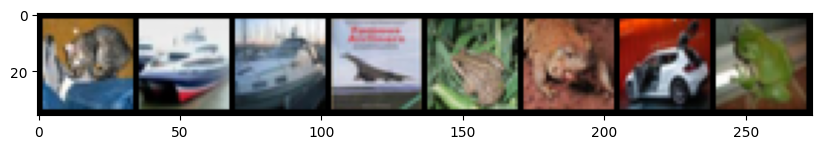

In [10]:
net.eval()
outputs = net(images)
imgs = torchvision.utils.make_grid(images)
plt.figure(figsize=(10, 5))
plt.imshow(imgs.permute(1, 2, 0).numpy())
print('GroundTruth: ', ' '.join(classes[labels[j]] for j in range(len(labels))))

In [11]:
_, predicted = torch.max(outputs, 1)

predicted

tensor([3, 9, 0, 0, 6, 6, 3, 6])

In [12]:
gt = np.array([classes[labels[j]] for j in range(len(labels))])
pred = np.array([classes[predicted[j]] for j in range(len(labels))])

print(gt)
print(pred)
print(f'Accuracy is {(gt == pred).sum() / len(gt)}')

['cat' 'ship' 'ship' 'plane' 'frog' 'frog' 'car' 'frog']
['cat' 'truck' 'plane' 'plane' 'frog' 'frog' 'cat' 'frog']
Accuracy is 0.625


**Простое добавление количества эпох с 5 до 30 на сети взятой с урока позволило угадать 6 картинок из 8**

# Построение новой модели

In [13]:
# Создайте собственную архитектуру! Можете использовать все, что угодно, но в ограничении на использование линейные слои (пока без сверток)
# Давайте добавим ограниченный Leaky_relu, то есть output = max(0.1x, 0.5x)
# Ваша задача добавить его в архитектуру сети как функцию активации
def LeakyRelu(input):
    return torch.max(0.1*input, 0.5*input)

In [14]:
class Net(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 16 * hidden_dim)
        self.fc2 = nn.Linear(16 * hidden_dim, 8 * hidden_dim)
        self.fc3 = nn.Linear(8 * hidden_dim, 4 * hidden_dim)
        self.fc4 = nn.Linear(4 * hidden_dim, 2 * hidden_dim)
        self.fc5 = nn.Linear(2 * hidden_dim, hidden_dim)
        self.fc6 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = LeakyRelu(x)
        x = self.fc2(x)
        x = LeakyRelu(x)
        x = self.fc3(x)
        x = LeakyRelu(x)
        x = self.fc4(x)
        x = LeakyRelu(x)
        x = self.fc5(x)
        x = LeakyRelu(x)
        x = self.fc6(x)
        return x
    
    def predict(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = LeakyRelu(x)
        x = self.fc2(x)
        x = LeakyRelu(x)
        x = self.fc3(x)
        x = LeakyRelu(x)
        x = self.fc4(x)
        x = LeakyRelu(x)
        x = self.fc5(x)
        x = LeakyRelu(x)
        x = self.fc6(x)
        x = F.softmax(x)
        return x
    
    
model = Net(3072, 100, 10)
model.train()

Net(
  (fc1): Linear(in_features=3072, out_features=1600, bias=True)
  (fc2): Linear(in_features=1600, out_features=800, bias=True)
  (fc3): Linear(in_features=800, out_features=400, bias=True)
  (fc4): Linear(in_features=400, out_features=200, bias=True)
  (fc5): Linear(in_features=200, out_features=100, bias=True)
  (fc6): Linear(in_features=100, out_features=10, bias=True)
)

**Попробуем изменить оптимизатор**

In [15]:
num_epochs = 30

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

Epoch [1/30]. Step [1/782]. Loss: 0.014
Epoch [1/30]. Step [301/782]. Loss: 0.012
Epoch [1/30]. Step [601/782]. Loss: 0.012
Epoch [2/30]. Step [1/782]. Loss: 0.014
Epoch [2/30]. Step [301/782]. Loss: 0.011
Epoch [2/30]. Step [601/782]. Loss: 0.012
Epoch [3/30]. Step [1/782]. Loss: 0.010
Epoch [3/30]. Step [301/782]. Loss: 0.011
Epoch [3/30]. Step [601/782]. Loss: 0.012
Epoch [4/30]. Step [1/782]. Loss: 0.008
Epoch [4/30]. Step [301/782]. Loss: 0.011
Epoch [4/30]. Step [601/782]. Loss: 0.011
Epoch [5/30]. Step [1/782]. Loss: 0.014
Epoch [5/30]. Step [301/782]. Loss: 0.010
Epoch [5/30]. Step [601/782]. Loss: 0.011
Epoch [6/30]. Step [1/782]. Loss: 0.007
Epoch [6/30]. Step [301/782]. Loss: 0.010
Epoch [6/30]. Step [601/782]. Loss: 0.011
Epoch [7/30]. Step [1/782]. Loss: 0.010
Epoch [7/30]. Step [301/782]. Loss: 0.010
Epoch [7/30]. Step [601/782]. Loss: 0.010
Epoch [8/30]. Step [1/782]. Loss: 0.010
Epoch [8/30]. Step [301/782]. Loss: 0.009
Epoch [8/30]. Step [601/782]. Loss: 0.010
Epoch [9

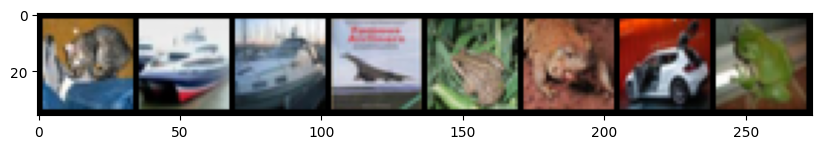

In [17]:
# Запустить обучение (по аналогии с тем, что делали на паре)
model.train()
for epoch in range(num_epochs):
    running_loss = 0.0
    running_items = 0.0

    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0], data[1] # входные данные с лейблами
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        # выводим статистику о процессе обучения
        running_loss += loss.item()
        running_items += len(labels)
        if i % 300 == 0:    # печатаем каждые 300 mini-batches
            print(f'Epoch [{epoch + 1}/{num_epochs}]. ' \
                  f'Step [{i + 1}/{len(train_loader)}]. ' \
                  f'Loss: {running_loss / running_items:.3f}')
            running_loss, running_items = 0.0, 0.0

print('Training is finished!')

model.eval()

dataiter = iter(test_loader)
images, labels = next(dataiter)

outputs = model(images)
imgs = torchvision.utils.make_grid(images)

plt.figure(figsize=(10, 5))
plt.imshow(imgs.permute(1, 2, 0).numpy())
print('Test classes: ', ' '.join(classes[labels[j]] for j in range(len(labels))))

_, predicted = torch.max(outputs, 1)

gt = np.array([classes[labels[j]] for j in range(len(labels))])
pred = np.array([classes[predicted[j]] for j in range(len(labels))])

print(gt)
print(pred)
print(f'Accuracy is {(gt == pred).sum() / len(gt)}')